In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

%matplotlib inline


In [3]:
tdt=pd.read_csv('C:\\balaji\\my\\ML\\train.csv')

In [4]:
tdt.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
tdt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
tdt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

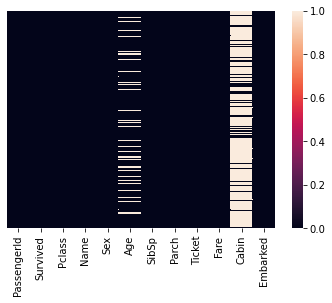

In [7]:
sns.heatmap(tdt.isnull(),yticklabels=False)

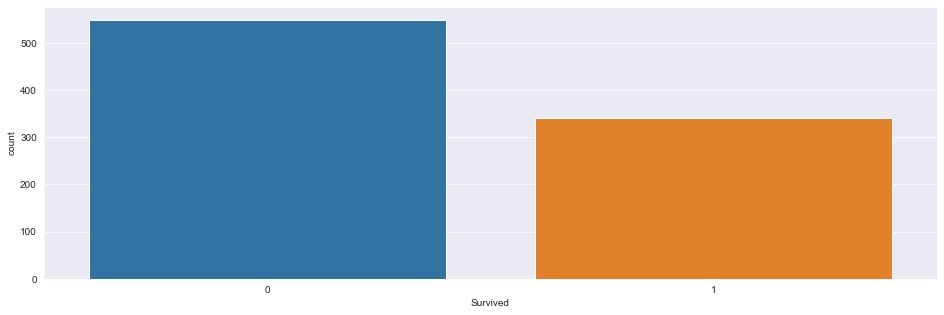

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,5))
sns.countplot(tdt.Survived)

In [9]:
tdt[tdt.Embarked.isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [10]:
tdt.dropna()[tdt.Embarked.isnull()]

c:\users\bmeka1\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

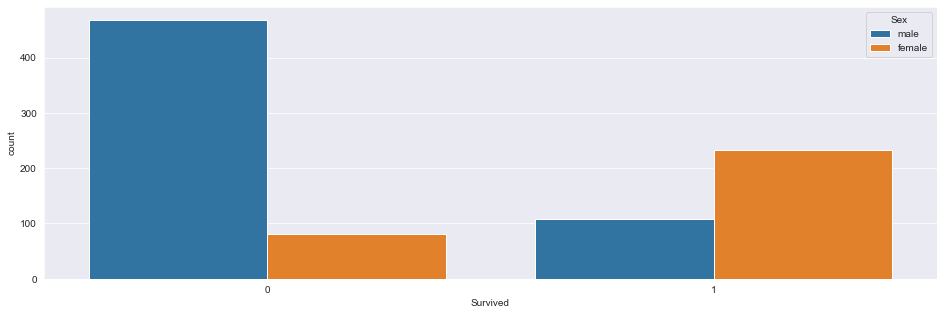

In [11]:
plt.figure(figsize=(16,5))
sns.countplot(x='Survived',hue='Sex',data=tdt)

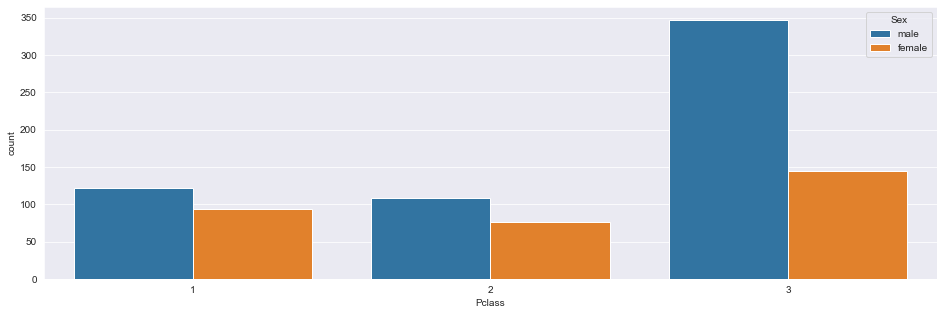

In [12]:
plt.figure(figsize=(16,5))
sns.countplot(x='Pclass',hue='Sex',data=tdt)

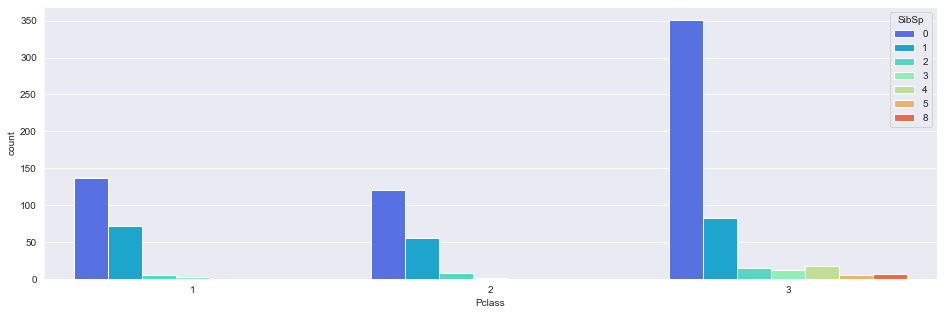

In [13]:
plt.figure(figsize=(16,5))
sns.countplot(x='Pclass',hue='SibSp',data=tdt,palette='rainbow')

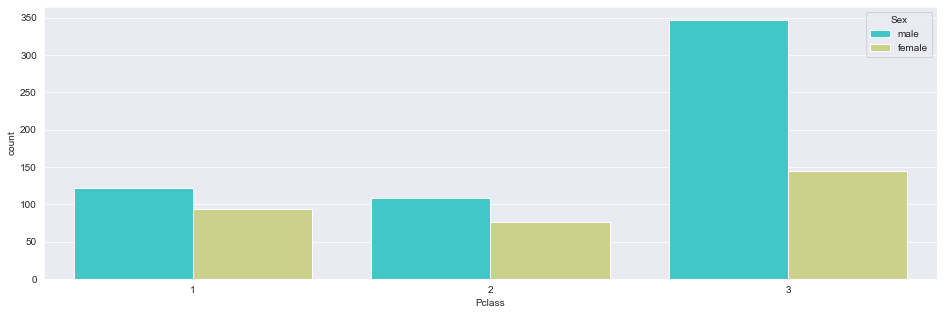

In [14]:
plt.figure(figsize=(16,5))
sns.countplot(x='Pclass',hue='Sex',data=tdt,palette='rainbow')

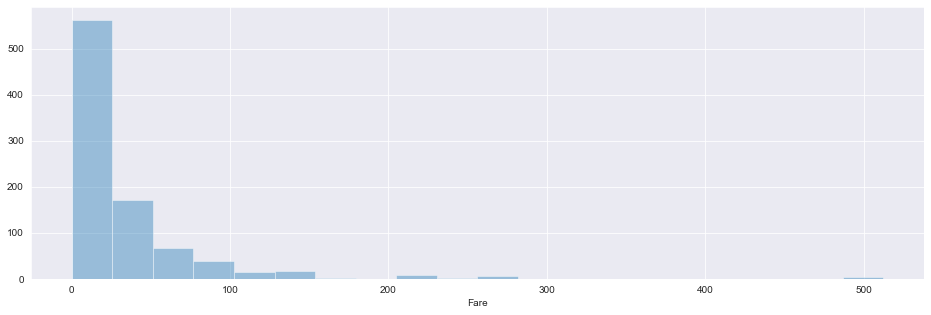

In [15]:
plt.figure(figsize=(16,5))
sns.distplot(tdt.Fare,kde=False,bins=20)

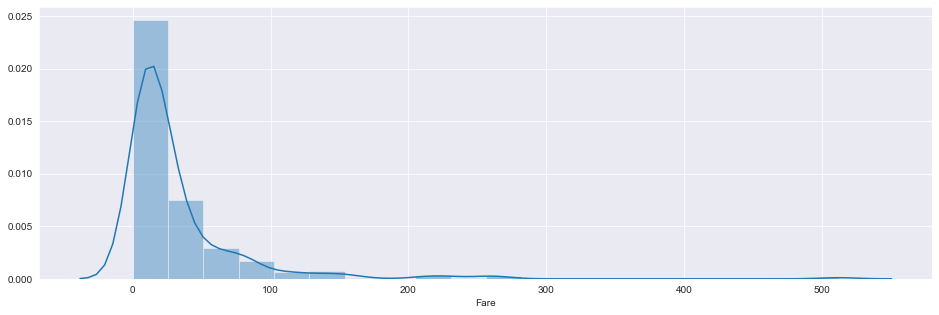

In [16]:
plt.figure(figsize=(16,5))
sns.distplot(tdt.Fare,bins=20)

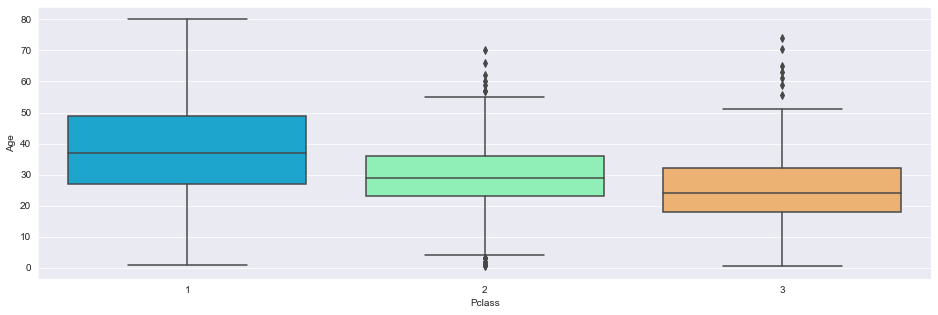

In [17]:
plt.figure(figsize=(16,5))
sns.boxplot(x='Pclass',y='Age',data=tdt,palette='rainbow')

In [18]:
tdt.Age.value_counts(ascending=False)

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [19]:
tdt.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
def imputeage(cols):
    age=cols[0]
    cls=cols[1]
    if pd.isnull(age):
        if cls==3:
            return 29
        elif cls==2:
            return 30
        else:
            return 39
    else:
        return age
        

In [22]:
tdt.Age=tdt[['Age','Pclass']].apply(imputeage,axis=1)

In [25]:
tdt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
tdt.dropna()

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
21            22         1       2   
23            24         1       1   
27            28         0       1   
31            32         1       1   
52            53         1       1   
54            55         0       1   
55            56         1       1   
62            63         0       1   
66            67         1       2   
75            76         0       3   
88            89         1       1   
92            93         0       1   
96            97         0       1   
97            98         1       1   
102          103         0       1   
110          111         0       1   
118          119         0       1   
123          124         1       2   
124          125         0       1   
128          129         1       3   
136          137         1       1   
137          138         0       1   
139          140         0       1   
148          149         0       2   
151          152         1       1   
..           ...       ...     ...   
748          749         0       1   
751          752         1       3   
759          760         1       1   
763          764         1       1   
765          766         1       1   
772          773         0       2   
776          777         0       3   
779          780         1       1   
781          782         1       1   
782          783         0       1   
789          790         0       1   
796          797         1       1   
802          803         1       1   
806          807         0       1   
809          810         1       1   
815          816         0       1   
820          821         1       1   
823          824         1       3   
835          836         1       1   
839          840         1       1   
849          850         1       1   
853          854         1       1   
857          858         1       1   
862          863         1       1   
867          868         0       1   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
21                               Beesley, Mr. Lawrence    male  34.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  39.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
54                      Ostby, Mr. Engelhart Cornelius    male  65.0      0   
55                                   Woolner, Mr. Hugh    male  39.0      0   
62                         Harris, Mr. Henry Birkhardt    male  45.0      1   
66                        Nye, Mrs. (Elizabeth Ramell)  female  29.0      0   
75                             Moen, Mr. Sigurd Hansen    male  25.0      0   
88                          Fortune, Miss. Mabel Helen  female  23.0      3   
92                         Chaffee, Mr. Herbert Fuller    male  46.0      1   
96                           Goldschmidt, Mr. George B    male  71.0      0   
97                     Greenfield, Mr. William Bertram    male  23.0      0   
102                          White, Mr. Richard Frasar    male  21.0

In [35]:
tdt[tdt.Embarked.isnull()].dropna(inplace=True)

c:\users\bmeka1\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
tdt.dropna[tdt.Embarked.isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [36]:
tdt.drop('Cabin',axis=1,inplace=True)

In [37]:
tdt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [38]:
tdt.dropna(inplace=True)

In [39]:
tdt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
Sex=pd.get_dummies(tdt.Sex,drop_first=True)
Embarked=pd.get_dummies(tdt.Embarked,drop_first=True)

In [42]:
tdt.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [43]:
tdt.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [44]:
tdt=pd.concat([tdt,Sex,Embarked],axis=1)

In [45]:
tdt.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [47]:
tdt.drop('Survived',axis=1).head()

PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1       3  22.0      1      0   7.2500     1  0  1
1            2       1  38.0      1      0  71.2833     0  0  0
2            3       3  26.0      0      0   7.9250     0  0  1
3            4       1  35.0      1      0  53.1000     0  0  1
4            5       3  35.0      0      0   8.0500     1  0  1

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(tdt.drop('Survived',axis=1),tdt.Survived,test_size=0.30,random_state=105)

In [49]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)

c:\users\bmeka1\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
predictions=logreg.predict(X_test)

In [51]:
accuracy=confusion_matrix(predictions,Y_test)

In [52]:
accuracy

array([[143,  30],
       [ 28,  66]], dtype=int64)

In [53]:
accuracy_score(Y_test,predictions)

0.7827715355805244